<a href="https://colab.research.google.com/github/HayateSato/DS_Tutorials/blob/main/BeansLeaf_Drive_PT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

- OBJECTIVES:
You work for a start-up that provides automatic detection of plant diseases by classifying images taken of leaves. Your task is to detect whether the leaf in the image suffers from Angular Leaf Spot or Bean Rust, or is healthy. Because Vision Transformers are trending right now you decide to use an implementation based on a Vision Transformer

## Background:
- Plant diseases have a significant impact on agriculture, often leading to massive crop losses if not detected and treated early. Diseases like Angular Leaf Spot and Bean Rust are common in plants like beans, and their early detection can mean the difference between a thriving crop and a ruined harvest. Manually inspecting leaves in large-scale farming is not only labor-intensive but also prone to human error.
This is where our solution comes in: automatic image classification to detect these diseases through simple photos of plant leaves.


## Data Gathering:

- Bean Leaf Dataset
```https://www.kaggle.com/datasets/prakharrastogi534/bean-leaf-dataset?resource=download-directory&select=test```

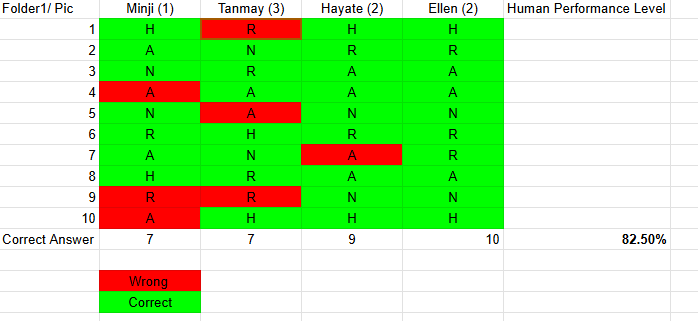

0.0 Importing libraries
==

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# !pip install datasets

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 18.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 13.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 6.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver 

In [ ]:
### For data manipulation and analysis
import pandas as pd
import numpy as np
#### For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### For PyTorch and image processing
import torch  # PyTorch library for deep learning
from torchvision import datasets, transforms  # Tools for loading and transforming image data
from torch.utils.data import DataLoader  # Creates data loaders for batching and iterating over datasets

#### For Hugging Face datasets and features
from datasets import (
    DatasetDict, # Holds multiple datasets (train, validation, test)
    Dataset, # Represents a dataset in Hugging Face format
    Features, # Defines the structure and types of data in a dataset
    ClassLabel, # Represents class labels for classification tasks
    Image  # Represents image data within a dataset
)

### For Hugging Face transformers and training
from transformers import (
    Trainer,  # Class for training PyTorch models with Hugging Face features
    TrainerCallback,  # Allows custom actions during the training process
    ViTForImageClassification,  # Vision Transformer model for image classification
    ViTImageProcessor,  # Processes images for Vision Transformer models
    TrainingArguments  # Holds hyperparameters and settings for training
)

### For model evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

### Others
from IPython.display import clear_output  # Clears output in Jupyter notebooks
import pickle  # For serializing and deserializing Python objects

1.0 Importing Data
==

In [4]:
train_path = f'/content/drive/MyDrive/Colab Notebooks/Dataset/Bean_leaf_dataset/train'
test_path = f'/content/drive/MyDrive/Colab Notebooks/Dataset/Bean_leaf_dataset/test'
val_path = f'/content/drive/MyDrive/Colab Notebooks/Dataset/Bean_leaf_dataset/validation'

# working_dir = train_path
# os.chdir(working_dir)
# os.listdir(working_dir)

In [5]:
# Set constants
BATCH_SIZE = 1
IMAGE_SIZE = 224
NUM_CLASSES = 4  # Adjust based on your dataset

# Define transformations (without data augmentation)
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to tensors
])

# Load datasets from directories
train_ds = datasets.ImageFolder(root=train_path, transform=transform)
val_ds = datasets.ImageFolder(root=val_path, transform=transform)
test_ds = datasets.ImageFolder(root=test_path, transform=transform)

def dataset_to_list(dataset):
    """
    Convert a PyTorch dataset to a list of dictionaries containing images and labels.
    """
    data = []
    for img, label in dataset:
        img = img.permute(1, 2, 0).numpy()  # Change shape to [height, width, channels]
        img = (img * 255).astype(np.uint8)  # Scale to [0, 255] and convert to uint8
        data.append({
            'image': img,   # Keep as NumPy array in uint8 format
            'labels': int(label)  # Convert label to scalar
        })
    return data

# Define features for the Hugging Face dataset
features = Features({
    'image': Image(),  # Image feature from Hugging Face
    'labels': ClassLabel(num_classes=NUM_CLASSES)  # Class label feature with NUM_CLASSES
})

# Convert datasets to lists of dictionaries
train_data = dataset_to_list(train_ds)
val_data = dataset_to_list(val_ds)
test_data = dataset_to_list(test_ds)

# Create Hugging Face datasets
train_hf_ds = Dataset.from_dict({
    'image': [item['image'] for item in train_data],
    'labels': [item['labels'] for item in train_data]
}, features=features)

val_hf_ds = Dataset.from_dict({
    'image': [item['image'] for item in val_data],
    'labels': [item['labels'] for item in val_data]
}, features=features)

test_hf_ds = Dataset.from_dict({
    'image': [item['image'] for item in test_data],
    'labels': [item['labels'] for item in test_data]
}, features=features)

# Create a DatasetDict
ds = DatasetDict({
    'train': train_hf_ds,
    'validation': val_hf_ds,
    'test': test_hf_ds
})

# Display details about the DatasetDict
print(ds)


DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 1406
    })
    validation: Dataset({
        features: ['image', 'labels'],
        num_rows: 177
    })
    test: Dataset({
        features: ['image', 'labels'],
        num_rows: 171
    })
})


**Print batch size and labels**

In [6]:
# Print class names and their corresponding indices
labels = ds['train'].features['labels']
print(labels)
print("Class names and indices:", train_ds.class_to_idx)

ClassLabel(names=['0', '1', '2', '3'], id=None)
Class names and indices: {'angular_leaf_spot': 0, 'bean_rust': 1, 'healthy': 2, 'no_leaf': 3}


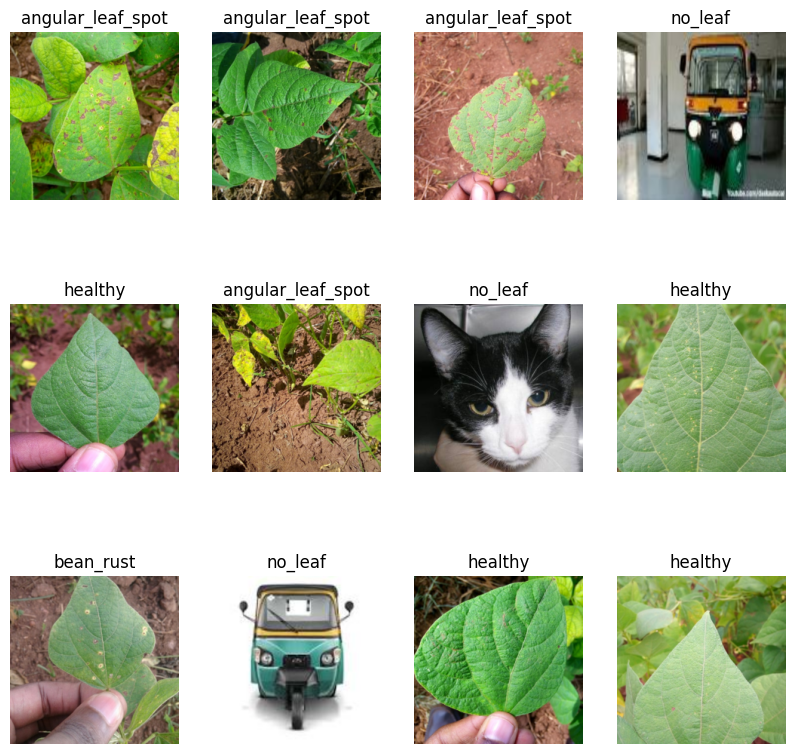

In [7]:

# Create DataLoader for the training dataset
train_loader = DataLoader(val_ds, batch_size=12, shuffle=True)  # Load 12 images for visualization

# Get class names from ImageFolder
class_names = train_ds.classes

# Plot images in a 3x4 grid
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_loader:
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        # Convert image to correct shape and scale to [0, 255]
        img = image_batch[i].permute(1, 2, 0).numpy() * 255  # Scale pixel values to [0, 255]
        plt.imshow(img.astype("uint8"))  # Convert to uint8 for display
        plt.title(class_names[labels_batch[i].item()])  # Get class name
        plt.axis("off")
    break  # Only plot one batch

plt.show()

3.0 Data Preparation
===

In [8]:
# Download Vision tranformer Beans Disease Classification Model
from transformers import ViTImageProcessor
model_name_or_path = 'nateraw/vit-base-beans'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

In [9]:
# Data Preparation with Data Argumentation


# Define augmentations
augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(),    # Random horizontal flip
    transforms.RandomRotation(15),        # Random rotation within 15 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Random color adjustments
])

# Transform and Argument the Dataset

def transform(example_batch):
    # Apply augmentations to each image in the batch
    augmented_images = [augmentation(x) for x in example_batch['image']]

    # Convert augmented images to pixel values
    inputs = processor(augmented_images, return_tensors='pt')

    # Include the labels in the output
    inputs['labels'] = example_batch['labels']
    return inputs

In [10]:
prepared_ds = ds.with_transform(transform)
prepared_ds

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 1406
    })
    validation: Dataset({
        features: ['image', 'labels'],
        num_rows: 177
    })
    test: Dataset({
        features: ['image', 'labels'],
        num_rows: 171
    })
})

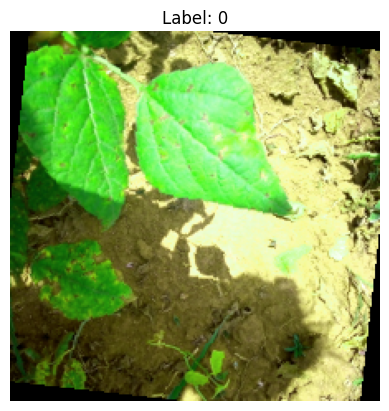

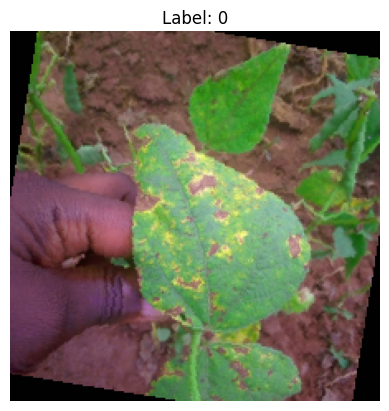

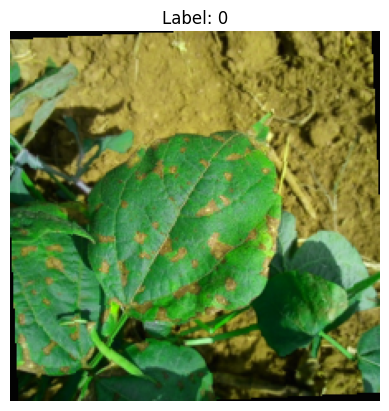

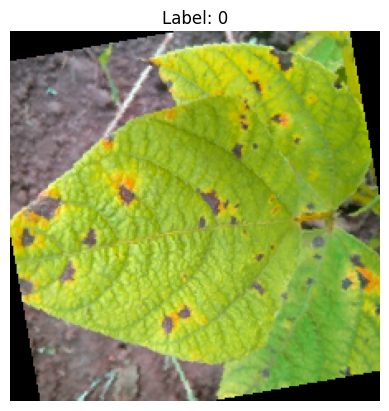

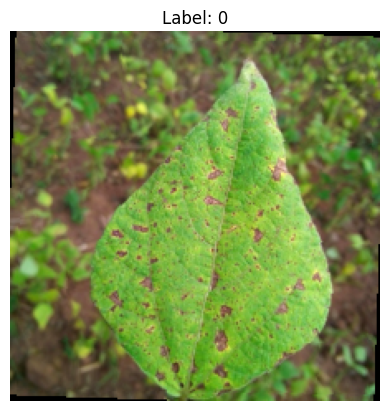

In [11]:


# Function to display a few sample images from the specified dataset split
def display_sample_images(dataset, split='train', num_samples=5):
    selected_dataset = dataset[split]
    for i in range(num_samples):
        example = selected_dataset[i]  # Get the example from the selected split

        # Access the image and label based on your dataset structure
        image = example['pixel_values']  # Use the correct key for images
        label = example['labels']  # Use the correct key for labels

        # Convert the tensor image to a numpy array and transpose dimensions for plt
        if image.ndim == 3:  # Assuming image is in shape (C, H, W)
            image = image.permute(1, 2, 0).numpy()  # Change if the dimensions are different
        elif image.ndim == 2:  # Handle grayscale images if necessary
            image = image.numpy()  # No need to permute for (H, W)

        # Rescale the image to [0, 1] for better visualization
        image = (image - image.min()) / (image.max() - image.min())  # Normalize to [0, 1]

        # Plot the image
        plt.imshow(image)
        plt.title(f'Label: {label.item()}' if hasattr(label, 'item') else f'Label: {label}')  # Safely access label
        plt.axis('off')
        plt.show()

# Call the function to display sample images from the training set
display_sample_images(prepared_ds, split='train', num_samples=5)  # Change 'train' to 'validation' or 'test' as needed


In [12]:


def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]), # putting the dataset into batches
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [13]:


def compute_metrics(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=1)
        accuracy = (predictions == labels).mean()

        # Replace with your loss function:
        loss = torch.nn.CrossEntropyLoss()(torch.tensor(logits), torch.tensor(labels))
        eval_loss = loss.mean().item()

        return {"accuracy": accuracy, "eval_loss": eval_loss}

In [14]:


labels = ds['train'].features['labels'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)},
    ignore_mismatched_sizes=True  # Add this argument
)

config.json:   0%|          | 0.00/756 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at nateraw/vit-base-beans and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
for name, param in model.named_parameters():
       if "vit.encoder.layer.0" in name:  # Example: Freeze the first layer of the encoder
           param.requires_grad = True

print(model)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

for name, param in model.named_parameters():
    if "fc" not in name:  # Freeze all layers except the final fully connected layer
        param.requires_grad = False

# Print out which layers are frozen and which are not
for name, param in model.named_parameters():
    status = "Frozen" if not param.requires_grad else "Trainable"
    print(f"Layer: {name} | Status: {status}")

In [16]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-beans",
  run_name="my_bean_experiment", # Add this line!
  per_device_train_batch_size=16,
  evaluation_strategy="epoch",
  num_train_epochs=10,
  fp16=True,
  save_steps=50, # it breaks one epoch into 50 steps, in TensorFlow this is preset
  eval_steps=50,
  logging_steps=1,
  learning_rate=1e-4, # from huggingface & and some tuning
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  load_best_model_at_end=True,
  save_strategy="epoch",
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [17]:
# Initialize lists to store metrics for plotting
train_accuracy, train_loss = [], []
val_accuracy, val_loss = [], []  # Initialize as empty lists

# Define compute_metrics function for validation
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    accuracy = (predictions == labels).mean()

    # Calculate validation loss using CrossEntropyLoss
    loss = torch.nn.CrossEntropyLoss()(torch.tensor(logits), torch.tensor(labels))
    eval_loss = loss.mean().item()

    # Append validation metrics for plotting
    val_accuracy.append(accuracy)
    val_loss.append(eval_loss)

    return {"accuracy": accuracy, "eval_loss": eval_loss}

# Define custom callback to live plot training metrics
class LivePlotCallback(TrainerCallback):
    def on_step_end(self, args, state, control, logs=None, **kwargs):
        # Ensure logs are not None
        if logs is not None:
            # Log training loss (if available)
            if 'loss' in logs:
                train_loss.append(logs['loss'])

            # Log training accuracy if it's in logs
            if 'accuracy' in logs:
                train_accuracy.append(logs['accuracy'])

            # Update the plot after each step
            clear_output(wait=True)
            steps = range(1, len(train_loss) + 1)

            plt.figure(figsize=(14, 5))

            # Plot Training and Validation Loss
            plt.subplot(1, 2, 1)
            plt.plot(steps, train_loss, label="Training Loss")
            if val_loss:
                plt.plot(steps, val_loss[:len(steps)], label="Validation Loss")
            plt.xlabel("Steps")
            plt.ylabel("Loss")
            plt.legend()

            # Plot Training and Validation Accuracy
            plt.subplot(1, 2, 2)
            plt.plot(steps, train_accuracy, label="Training Accuracy")
            if val_accuracy:
                plt.plot(steps, val_accuracy[:len(steps)], label="Validation Accuracy")
            plt.xlabel("Steps")
            plt.ylabel("Accuracy")
            plt.legend()

            plt.show()

# Initialize the Trainer with model, args, datasets, and metrics
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["validation"],
    tokenizer=processor,
)

# Add the custom live plotting callback to the Trainer
trainer.add_callback(LivePlotCallback())

# Start training
train_results = trainer.train()


<ipython-input-17-a58fb3b4e56f>:61: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [18]:
print(train_results)

TrainOutput(global_step=880, training_loss=0.07792391517432407, metrics={'train_runtime': 882.0186, 'train_samples_per_second': 15.941, 'train_steps_per_second': 0.998, 'total_flos': 1.0895569043388826e+18, 'train_loss': 0.07792391517432407, 'epoch': 10.0})


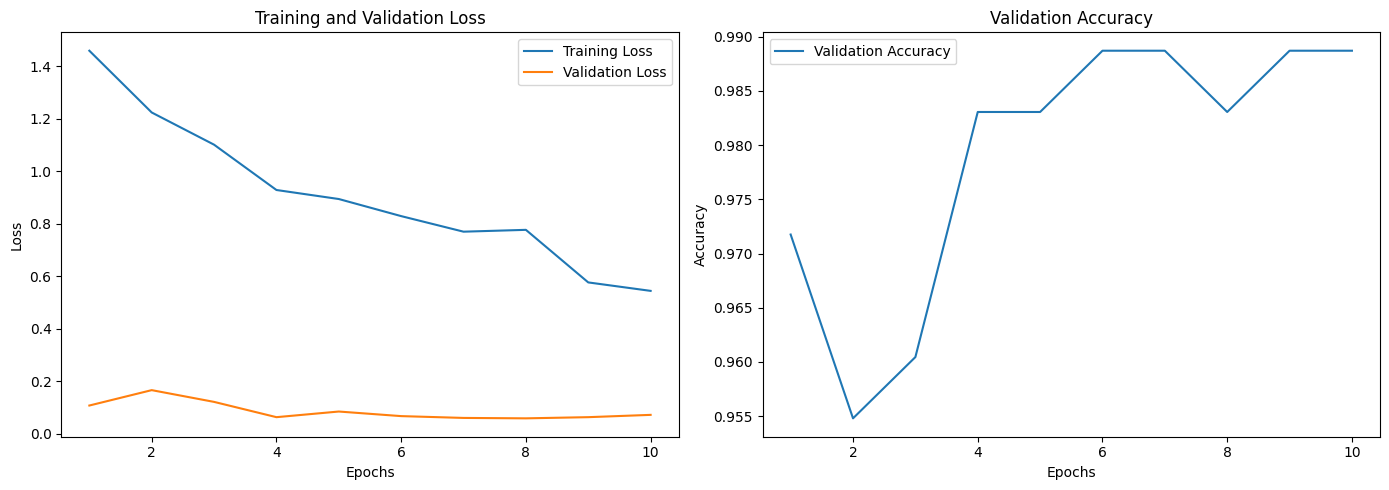

In [19]:
# Initialize lists to store accuracy and loss values
train_loss = []
val_accuracy = []
val_loss = []

# Filter epoch-level logs from trainer.state.log_history
for log in trainer.state.log_history:
    if 'loss' in log and 'epoch' in log:
        train_loss.append(log['loss'])
    if 'eval_loss' in log and 'eval_accuracy' in log:
        val_loss.append(log['eval_loss'])
        val_accuracy.append(log['eval_accuracy'])

# Plot using the available epochs for which we have both training and validation logs
epochs = range(1, len(val_loss) + 1)

# Plot Training and Validation Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss[:len(epochs)], label="Training Loss")  # Match to length of available validation data
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plot Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracy, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
import pickle

# Save the model
with open('beanLeaf_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the processor (optional)
with open('beanLeaf_processor.pkl', 'wb') as f:
    pickle.dump(processor, f)

In [21]:
trainer.save_state()

In [24]:
# Create the test dataloader
test_dataloader = DataLoader(prepared_ds['test'], batch_size=16, collate_fn=collate_fn)

predictions = []
labels = []

model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient calculation during inference
    for batch in test_dataloader:
        # Move batch to the same device as the model
        batch = {k: v.to(model.device) if hasattr(v, 'to') else v for k, v in batch.items()}

        outputs = model(**batch)  # Get model outputs
        predicted_labels = outputs.logits.argmax(-1)  # Get predicted class labels

        # Move predictions and labels to CPU before converting to numpy
        predictions.extend(predicted_labels.cpu().numpy())
        labels.extend(batch['labels'].cpu().numpy())

# Convert lists to numpy arrays
predictions = np.array(predictions)
labels = np.array(labels)

# Create confusion matrix
cm = confusion_matrix(labels, predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[42  1  0  0]
 [ 3 40  0  0]
 [ 0  0 42  0]
 [ 0  0  0 43]]


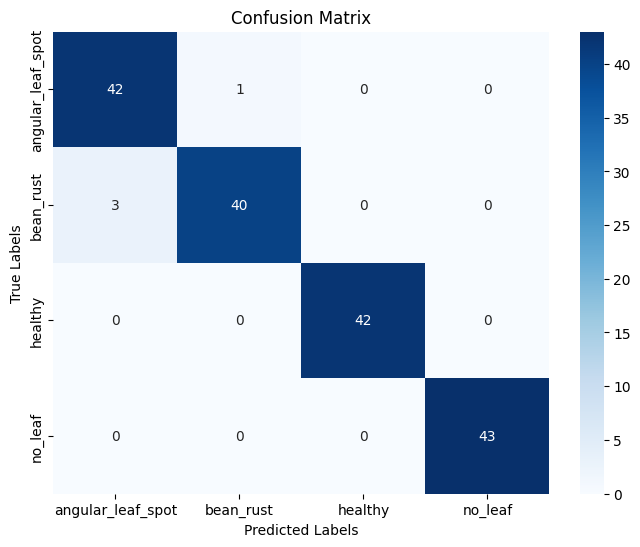

In [25]:
class_names = train_ds.classes

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Print Accuracy
accuracy = accuracy_score(labels, predictions)
precision = precision_score(labels, predictions, average='weighted')  # Use weighted average for multi-class
f1 = f1_score(labels, predictions, average='weighted')  # Use weighted average for multi-class
data = {'Metric': ['Accuracy', 'Precision', 'F1 Score'],
        'Score': [accuracy, precision, f1]}
df = pd.DataFrame(data)
print(df.to_string(index=False))  # Display table without inde





   Metric    Score
 Accuracy 0.976608
Precision 0.977103
 F1 Score 0.976596


In [ ]:
stop the code here

Data Preprocessing
----

Distribution of Classes.
====

Goal: Check if the dataset is balanced across the three classes: Angular Leaf Spot, Bean Rust, and Healthy.

In [ ]:
# # Get class names from the dataset
# class_names = train_ds.classes

# # Iterate through the dataset to collect labels
# class_labels = []
# for images, labels in train_ds:  # Unpack images and labels from the dataset
#     class_labels.extend(labels.numpy())  # Convert labels to NumPy array and extend the list

# # Count the occurrences of each class label
# class_counts = Counter(class_labels)

# # Print class distribution with class names
# print("Class Distribution:")
# for label, count in class_counts.items():
#     print(f"Class label {label} ({class_names[label]}): {count}")

Image Data Format and Quality
===

In [ ]:
# for images, _ in train_ds.take(1):  # Take one batch of images
#     for img in images:
#         img = np.array(img)  # Convert tensor to NumPy array
#         print(f"Image shape: {img.shape}, Image dtype: {img.dtype}")
#         break  # Checking just one image for format and size

# # Unbatch the dataset to process individual images
# train_ds_unbatched = train_ds.unbatch()

# # Initialize the figure
# plt.figure(figsize=(10, 10))

# # Display 12 individual images
# for i, (image, label) in enumerate(train_ds_unbatched.take(12)):  # take 12 images
#     ax = plt.subplot(3, 4, i + 1)
#     plt.imshow(image.numpy().astype("uint8"))  # Display image
#     plt.title(class_names[label])  # Display label using class names
#     plt.axis("off")  # Remove axes

# plt.show()


Any Missing, Corrupted, or Duplicate Images?
====

In [ ]:
# # Checking for corrupted images
# # # !pip install tensorflow

# # import tensorflow as tf
# # from PIL import Image

# corrupted_images = []
# # Iterate through the dataset, accessing individual image paths
# for images, labels in train_ds:
#     for img_tensor in images:
#         try:
#             # Convert the tensor to a NumPy array
#             img_array = img_tensor.numpy()
#             # Create a PIL Image from the NumPy array
#             img = Image.fromarray(img_array.astype('uint8'))
#             img.verify()  # Verify if the image is valid
#         except (IOError, SyntaxError) as e:
#             print(f"Corrupted Image: {img_tensor}")
#             corrupted_images.append(img_tensor)


# print(f"the number of corrupted Images: {len(corrupted_images)}")

In [ ]:
# #duplicate images
# # import hashlib
# # import os

# def file_hash(filepath):
#     """Calculate the hash of a file."""
#     with open(filepath, 'rb') as f:
#         return hashlib.md5(f.read()).hexdigest()

# image_hashes = {}
# duplicates = []
# for img_name in os.listdir(train_path):
#     img_path = os.path.join(train_path, img_name)
#     # Check if the item is a file before calculating the hash
#     if os.path.isfile(img_path):
#         img_hash = file_hash(img_path)
#         if img_hash in image_hashes:
#             duplicates.append(img_name)
#         else:
#             image_hashes[img_hash] = img_name

# print(f"the number of duplicate Images: {len(duplicates)}")

Data Augmentation
===

In [ ]:
# # import tensorflow as tf
# # from tensorflow import keras
# # from tensorflow.keras import layers

# # Data Argumentation
# resize_and_rescale = keras.Sequential([
#     layers.Resizing(224, 224),
#     layers.Rescaling(1./255)
# ])

# # Image augmentation
# data_augmentation = keras.Sequential([
#     layers.RandomFlip("horizontal_and_vertical"),
#     layers.RandomRotation(0.2),
#     layers.RandomZoom(0.1),
#     layers.RandomBrightness(factor=0.1),  # Adjust brightness by a factor (0.0 - 1.0)
#     layers.RandomContrast(factor=0.1),    # Adjust contrast by a factor (0.0 - 1.0)
#     layers.RandomSaturation(factor=0.1)
#     ######## add lighting / saturation of the image samples ##########
# ])

In [ ]:
# # Data enhancement
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# # Unbatch the dataset to get individual images
# unbatched_ds = train_ds.unbatch()

# # Take one image and its label
# for image, label in unbatched_ds.take(4):
#     # Apply resizing and rescaling
#     resized_image = resize_and_rescale(image)

#     # Apply augmentation
#     augmented_image = data_augmentation(resized_image)

#     # Convert both images from float32 [0,1] to uint8 [0,255] for display
#     resized_image = tf.clip_by_value(resized_image * 255, 0, 255)
#     resized_image = tf.cast(resized_image, tf.uint8)

#     augmented_image = tf.clip_by_value(augmented_image * 255, 0, 255)
#     augmented_image = tf.cast(augmented_image, tf.uint8)

#     # Plot both images side by side
#     plt.figure(figsize=(10, 5))

#     # Show resized image
#     plt.subplot(1, 2, 1)
#     plt.imshow(resized_image.numpy())
#     plt.title("Resized and Rescaled Image")
#     plt.axis("off")

#     # Show augmented image
#     plt.subplot(1, 2, 2)
#     plt.imshow(augmented_image.numpy())
#     plt.title("Augmented Image")
#     plt.axis("off")

#     plt.show()

In [ ]:
### Epoch should be less than 10max (possibily 20 with this dataset unless the loss is reudced)
### or tweak the lr

2.0

In [ ]:

# # Set constants
# BATCH_SIZE = 1
# IMAGE_SIZE = 224
# NUM_CLASSES = 4  # Adjust based on your dataset

# # Define transformations (without data augmentation)
# transform = transforms.Compose([
#     transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),  # Resize images to 224x224
#     transforms.ToTensor(),  # Convert images to tensors
# ])

# # Load datasets from directories
# train_ds = datasets.ImageFolder(root="train_path", transform=transform)
# val_ds = datasets.ImageFolder(root="val_path", transform=transform)
# test_ds = datasets.ImageFolder(root="test_path", transform=transform)

# def dataset_to_list(dataset):
#     """
#     Convert a PyTorch dataset to a list of dictionaries containing images and labels.
#     """
#     data = []
#     for img, label in dataset:
#         img = img.permute(1, 2, 0).numpy()  # Change shape to [height, width, channels]
#         img = (img * 255).astype(np.uint8)  # Scale to [0, 255] and convert to uint8
#         data.append({
#             'image': img,   # Keep as NumPy array in uint8 format
#             'labels': int(label)  # Convert label to scalar
#         })
#     return data

# # Define features for the Hugging Face dataset
# features = Features({
#     'image': Image(),  # Image feature from Hugging Face
#     'labels': ClassLabel(num_classes=NUM_CLASSES)  # Class label feature with NUM_CLASSES
# })

# # Convert datasets to lists of dictionaries
# train_data = dataset_to_list(train_ds)
# val_data = dataset_to_list(val_ds)
# test_data = dataset_to_list(test_ds)

# # Create Hugging Face datasets
# train_hf_ds = Dataset.from_dict({
#     'image': [item['image'] for item in train_data],
#     'labels': [item['labels'] for item in train_data]
# }, features=features)

# val_hf_ds = Dataset.from_dict({
#     'image': [item['image'] for item in val_data],
#     'labels': [item['labels'] for item in val_data]
# }, features=features)

# test_hf_ds = Dataset.from_dict({
#     'image': [item['image'] for item in test_data],
#     'labels': [item['labels'] for item in test_data]
# }, features=features)

# # Create a DatasetDict
# ds = DatasetDict({
#     'train': train_hf_ds,
#     'validation': val_hf_ds,
#     'test': test_hf_ds
# })

# # Display details about the DatasetDict
# print(ds)
